In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
buh=pd.read_csv(r"C:\Users\edwm9\Desktop\viz _ HW\1с.csv", sep=';')
buh['Себестоимость с наценкой'] = buh['Себестоимость с наценкой'].str.replace(' ', '').str.replace(',', '.').astype(float)
buh['Количество'] = buh['Количество'].str.replace('-', '').str.replace(' ', '').astype(float)
buh['Дата.Название месяца'] = buh['Дата.Название месяца'].str.replace(' ', '').astype(str)
buh['Номенклатура.Код'] = buh['Номенклатура.Код'].str.replace(' ', '').astype(str)
buh_CFO = buh.groupby('ЦФО').agg({'Себестоимость с наценкой':'sum'}).reset_index()
buh_CFO['Себестоимость с наценкой'] = buh_CFO['Себестоимость с наценкой']/1000
buh['Дата.Название месяца'] = pd.to_datetime(buh['Дата.Название месяца'], format="%B%Y")                                                                            


1.Продажи по нарпавлениям. Показывает общие объемы продаж за период по направлениям. 
Переменными выступают - направления продаж
Значение - себестоимость продаж в тыс. руб. 



Text(0.5, 1.0, 'Продажи по направлениям')

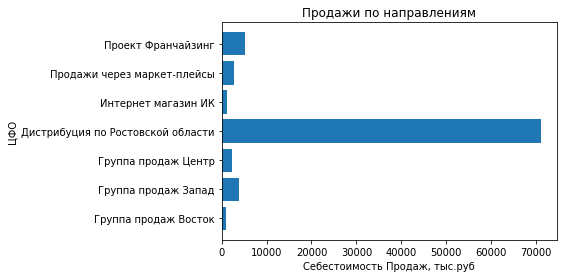

In [3]:
plt.barh(buh_CFO['ЦФО'], buh_CFO['Себестоимость с наценкой'])
plt.xlabel('Себестоимость Продаж, тыс.руб')
plt.ylabel('ЦФО')
plt.title('Продажи по направлениям')



2.Доля продаж направления - Дистрибуции по Ростовской области по месяцам. Переменными выступают месяца , значение - себестоимость продаж в тыс. руб. 
Визуализация демонстрирует динамику продаж по направлению - Дистрибуции по Ростовской области.

Text(0.5, 1.0, 'Сравнение Групп продаж')

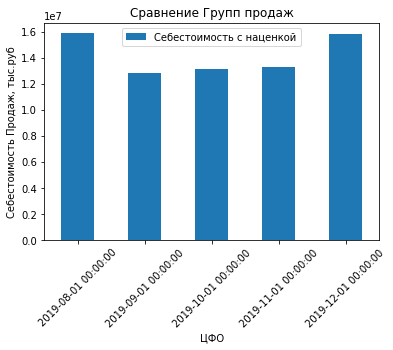

In [46]:
DRO = buh[buh['ЦФО'] == 'Дистрибуция по Ростовской области']
DRO = DRO.groupby('Дата.Название месяца').agg({'Себестоимость с наценкой':'sum'})
DRO.plot(kind='bar', rot=45, stacked=True)
plt.xlabel('ЦФО')
plt.ylabel('Себестоимость Продаж, тыс.руб')
plt.title('Продажи ДРО по месяц')

In [ ]:
3.Сравнение групп продаж.  Данная визуализация наглядно демонстрирует долю групп продаж в направлении продаж по России

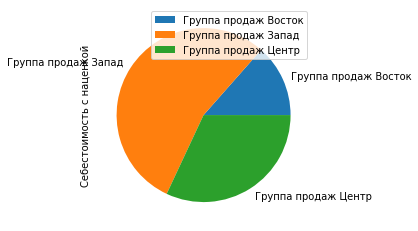

In [47]:
buh_CFO_noDRO = buh_CFO[(buh_CFO['ЦФО'] == 'Группа продаж Запад' )| (buh_CFO['ЦФО'] == 'Группа продаж Центр') | (buh_CFO['ЦФО'] == 'Группа продаж Восток')]
buh_CFO_noDRO = buh_CFO_noDRO.set_index(['ЦФО'])
buh_CFO_noDRO.plot(kind='pie', y='Себестоимость с наценкой')


4.Продажи по месяцам. Динамика продаж Группы продаж Запад, демострирует динамику продажи по месяцам, позволяет выявить тренды.  

Text(0.5, 1.0, 'Динамика продаж по месяц')

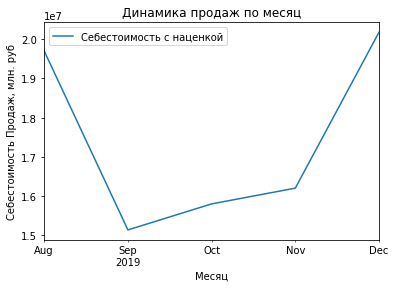

In [41]:
sales_west = buh[buh['ЦФО'] == 'Группа продаж Запад']
sales_west = buh.groupby(['Дата.Название месяца']).agg({'Себестоимость с наценкой':'sum'})
sales_west.plot()
plt.xlabel('Месяц')
plt.ylabel('Себестоимость Продаж, млн. руб')
plt.title('Динамика продаж по месяц')

5. Интерактивная визуазация. Продажи по месяцам в штука. Позволяет визуализировать динамику продаж в штук, так же работают интератиквные функции, уменьшая/увеличивая масштаб, для того чтобы сфокусировать на частостях.

In [63]:
buh2=pd.read_csv(r"C:\Users\edwm9\Desktop\viz _ HW\1с_22.csv", sep=';')
buh2['Названия строк'] = buh2['Названия строк'].str.replace(' ', '').astype(str)
buh2['Названия строк'] = pd.to_datetime(buh2['Названия строк'], format="%B%Y")
buh2 = buh2.sort_values(('Названия строк'), ascending=True)

In [82]:
trace0 = go.Scatter(
    x=buh2['Названия строк'],
    y=buh2['Группа продаж Восток'],
    name='Группа продаж Восток'
)

trace1 = go.Scatter(
    x=buh2['Названия строк'],
    y=buh2['Группа продаж Центр'],
    name='Группа продаж центр'
)

trace2 = go.Scatter(
    x=buh2['Названия строк'],
    y=buh2['Группа продаж Запад'],
    name='Группа продаж Запад'
)

trace4 = go.Scatter(
    x=buh2['Названия строк'],
    y=buh2['Интернет магазин ИК'],
    name='Интернет магазин ИК'
)
trace5 = go.Scatter(
    x=buh2['Названия строк'],
    y=buh2['Продажи через маркет-плейсы'],
    name='Продажи через маркет-плейсы'
)


  
data = [trace0, trace1, trace2, trace4, trace5]
layout = {'title': 'Продажи по месяцам, шт.'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)